In [0]:
from sklearn import tree
import pandas as pd
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### **Obtendo a base de dados**

In [3]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data -O credit_approval.csv

--2019-11-21 00:08:55--  http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘credit_approval.csv’

credit_approval.csv 100%[===================>]  31.46K  --.-KB/s    in 0.03s   

2019-11-21 00:08:55 (1.08 MB/s) - ‘credit_approval.csv’ saved [32218/32218]



### **Lendo a base de dados**

In [0]:
columns = ['gender', 'age', 'debt', 'married', 'bankcustomer', 'educationlevel', 'ethnicity', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'citizen', 'zipcode', 'income', 'class']

In [0]:
df = pd.read_csv('credit_approval.csv', names=columns)

In [34]:
df.head()

,gender,age,debt,married,bankcustomer,educationlevel,ethnicity,yearsemployed,priordefault,employed,creditscore,driverslicense,citizen,zipcode,income,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### **Fazendo algum preprocessamento**

In [0]:
df.replace('?',np.NaN, inplace=True)

In [0]:
df.dropna(inplace=True)

### **Sumetendo a um modelo de árvore de decisão**

In [0]:
categorical_data_columns = ['gender', 'married', 'bankcustomer', 'educationlevel', 'ethnicity', 'priordefault', 'employed', 'driverslicense', 'citizen']
target_columns = ['class']

In [0]:
# Usando one-hot encoding para representar numericamente os dados categóricos
one_hot_data = pd.get_dummies(df[categorical_data_columns],drop_first=True)

In [0]:
y = df[target_columns]

X_train, X_test, y_train, y_test = train_test_split(one_hot_data, y, test_size=0.33, random_state=42)

In [40]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=20)
clf = clf.fit(X_train, y_train)
tree.export_graphviz(clf, feature_names=one_hot_data.columns, class_names=df['class'], label='root')

'digraph Tree {\nnode [shape=box] ;\n0 [label="priordefault_t <= 0.5\\ngini = 0.497\\nsamples = 437\\nvalue = [201, 236]\\nclass = +"] ;\n1 [label="bankcustomer_gg <= 0.5\\n0.103\\n203\\n[11, 192]\\n+"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="educationlevel_x <= 0.5\\n0.094\\n202\\n[10, 192]\\n+"] ;\n1 -> 2 ;\n3 [label="0.087\\n198\\n[9, 189]\\n+"] ;\n2 -> 3 ;\n4 [label="0.375\\n4\\n[1, 3]\\n+"] ;\n2 -> 4 ;\n5 [label="0.0\\n1\\n[1, 0]\\n+"] ;\n1 -> 5 ;\n6 [label="employed_t <= 0.5\\n0.305\\n234\\n[190, 44]\\n+"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="married_y <= 0.5\\n0.478\\n76\\n[46, 30]\\n+"] ;\n6 -> 7 ;\n8 [label="0.437\\n59\\n[40, 19]\\n+"] ;\n7 -> 8 ;\n9 [label="0.457\\n17\\n[6, 11]\\n+"] ;\n7 -> 9 ;\n10 [label="educationlevel_q <= 0.5\\n0.162\\n158\\n[144, 14]\\n+"] ;\n6 -> 10 ;\n11 [label="0.121\\n124\\n[116, 8]\\n+"] ;\n10 -> 11 ;\n12 [label="0.291\\n34\\n[28, 6]\\n+"] ;\n10 -> 12 ;\n}'

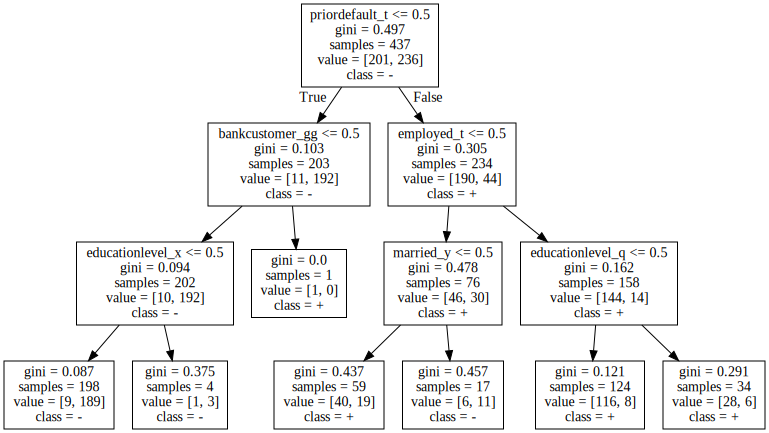

In [41]:
dot_data = tree.export_graphviz(clf, feature_names=one_hot_data.columns, class_names=['+', '-'], precision=3,  label='all')  
graph = graphviz.Source(dot_data)  
graph 

### **Validando nosso primeiro modelo**

In [0]:
y_predicted = clf.predict(X_test)
y_true = y_test['class'].tolist()

In [43]:
accuracy_score(y_true, y_predicted)

0.8472222222222222

## **Sua acurácia aumentou, né?**

![alt text](https://miro.medium.com/max/700/1*x7P7gqjo8k2_bj2rTQWAfg.jpeg)

## **Mas você consegue explicar esse resultado?**

In [31]:
one_hot_data.columns.to_list()

['gender_b',
 'married_u',
 'married_y',
 'bankcustomer_gg',
 'bankcustomer_p',
 'educationlevel_c',
 'educationlevel_cc',
 'educationlevel_d',
 'educationlevel_e',
 'educationlevel_ff',
 'educationlevel_i',
 'educationlevel_j',
 'educationlevel_k',
 'educationlevel_m',
 'educationlevel_q',
 'educationlevel_r',
 'educationlevel_w',
 'educationlevel_x',
 'ethnicity_dd',
 'ethnicity_ff',
 'ethnicity_h',
 'ethnicity_j',
 'ethnicity_n',
 'ethnicity_o',
 'ethnicity_v',
 'ethnicity_z',
 'priordefault_t',
 'employed_t',
 'driverslicense_t',
 'citizen_p',
 'citizen_s',
 'zipcode_00017',
 'zipcode_00020',
 'zipcode_00021',
 'zipcode_00022',
 'zipcode_00024',
 'zipcode_00028',
 'zipcode_00029',
 'zipcode_00030',
 'zipcode_00032',
 'zipcode_00040',
 'zipcode_00043',
 'zipcode_00045',
 'zipcode_00049',
 'zipcode_00050',
 'zipcode_00052',
 'zipcode_00056',
 'zipcode_00060',
 'zipcode_00062',
 'zipcode_00070',
 'zipcode_00073',
 'zipcode_00075',
 'zipcode_00076',
 'zipcode_00080',
 'zipcode_00086',
